In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
sns.set_color_codes()

Populating the interactive namespace from numpy and matplotlib


In [2]:
%run ../GPclust/OMGP.py

In [3]:
df = pd.read_csv('../data/split_data_test.csv')
X = np.atleast_2d(df.x).T
Y = np.atleast_2d(df.y).T

In [11]:
m = OMGP(X, Y, K=2, prior_Z='symmetric')
m.s2 = 0.5  # Model variance
m.hyperparam_interval = 3  # Frequency of hyperparameter optimizations

print m.log_likelihood()

[[-255.20628074]]


In [12]:
m

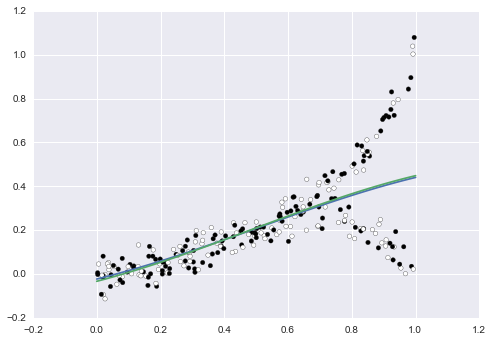

In [13]:
# Before optimization

XX = np.atleast_2d(np.linspace(0,1)).T

YY = m.predict_components(XX)

plt.scatter(m.X, m.Y, c=np.argmax(m.phi, 1));
for i in range(m.phi.shape[1]):
    plt.plot(XX, YY[:, i]);

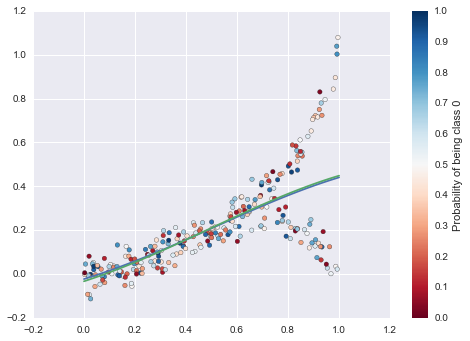

In [15]:
YY = m.predict_components(XX)

plt.scatter(m.X, m.Y, c=(m.phi[:,0]), cmap=cm.RdBu, vmin=0., vmax=1.);
cb = plt.colorbar()
cb.set_label('Probability of being class 0')
for i in range(m.phi.shape[1]):
    plt.plot(XX, YY[:, i]);

In [16]:
m.optimize(step_length=0.1, method='steepest')

iteration 43 bound=[[-158.07833407]] grad=1.03126190473e-05, beta=0 vb converged (ftol)


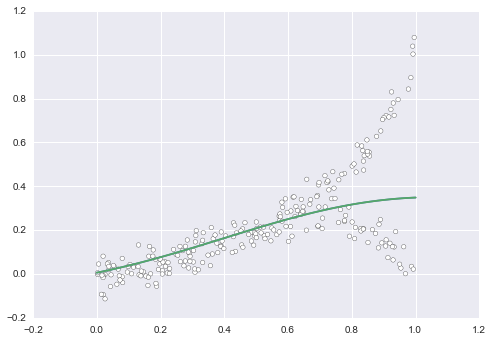

In [17]:
# After optimization

XX = np.atleast_2d(np.linspace(0,1)).T

YY = m.predict_components(XX)

plt.scatter(m.X, m.Y, c=np.argmax(m.phi, 1));
for i in range(m.phi.shape[1]):
    plt.plot(XX, YY[:, i]);

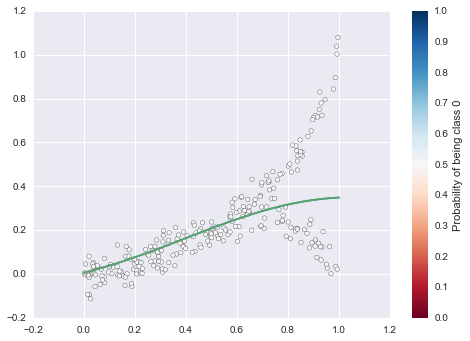

In [18]:
YY = m.predict_components(XX)

plt.scatter(m.X, m.Y, c=(m.phi[:,0]), cmap=cm.RdBu, vmin=0., vmax=1.);
cb = plt.colorbar()
cb.set_label('Probability of being class 0')
for i in range(m.phi.shape[1]):
    plt.plot(XX, YY[:, i]);

In [19]:
m

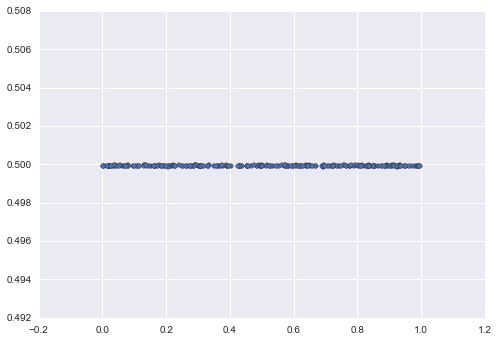

In [20]:
plt.scatter(m.X, m.phi[:,0]);